In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing filterwarnings to ignore warning messages**

In [3]:
import warnings
warnings.filterwarnings('ignore')

**Import Required Library**

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy.stats import shapiro, bartlett
from sklearn import metrics
from statsmodels.stats.stattools import durbin_watson

**Importing Dataset**

In [5]:
data = pd.read_excel("/content/drive/MyDrive/MVA/Life Expectancy Cleaned (2008 to 2015).xlsx")

In [6]:
data

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.0,831,...,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,...,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,...,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,Venezuela (Bolivarian Republic of),2008,Developing,73.2,168.0,9.000000,8.180000,0.000000,55.0,0,...,76.0,3.98,52.0,0.1,10604.040364,9.487742e+06,1.6,1.5,0.745,13.4
1470,Viet Nam,2008,Developing,74.9,135.0,28.000000,3.580000,0.000000,87.0,352,...,93.0,5.53,93.0,0.2,10604.040364,9.487742e+06,14.7,15.5,0.633,11.6
1471,Yemen,2008,Developing,63.8,238.0,37.000000,0.040000,0.000000,78.0,7,...,78.0,5.12,78.0,0.1,10604.040364,9.487742e+06,13.8,13.7,0.480,8.5
1472,Zambia,2008,Developing,55.7,45.0,31.000000,2.120000,153.678375,87.0,140,...,52.0,4.87,87.0,1.8,1369.682490,1.382517e+06,6.8,6.7,0.504,11.4


**Data Pre-Processing**

**Creating a copy of original dataset**



In [7]:
df = data.copy()

In [8]:
df.head(10)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.000000,0.010000,71.279624,65.0,831,...,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
1,Albania,2015,Developing,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,Algeria,2015,Developing,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,...,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
3,Angola,2015,Developing,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,...,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,Antigua and Barbuda,2015,Developing,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,...,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
5,Argentina,2015,Developing,76.3,116.0,8.000000,5.288333,0.000000,94.0,0,...,93.0,7.08,94.0,0.1,13467.123600,2.865628e+07,1.0,0.9,0.826,17.3
6,Armenia,2015,Developing,74.8,118.0,1.000000,5.288333,0.000000,94.0,33,...,96.0,7.08,94.0,0.1,369.654776,2.916950e+05,2.1,2.2,0.741,12.7
7,Australia,2015,Developed,82.8,59.0,1.000000,5.288333,0.000000,93.0,74,...,93.0,7.08,93.0,0.1,16784.346160,2.378934e+07,0.6,0.6,0.937,19.5
8,Austria,2015,Developed,81.5,65.0,35.129032,5.288333,0.000000,93.0,309,...,93.0,7.08,93.0,0.1,16784.346160,8.633169e+06,1.9,2.1,0.892,15.9
9,Azerbaijan,2015,Developing,72.7,118.0,5.000000,5.288333,0.000000,96.0,0,...,98.0,7.08,96.0,0.1,55.313820,9.649341e+06,2.8,2.9,0.758,12.7


In [10]:
df.tail(10)

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
1464,United Republic of Tanzania,2008,Developing,56.2,376.0,92.000000,3.44,0.000000,86.0,831,...,89.0,4.21,86.0,1.8,10604.040364,9.487742e+06,7.3,7.3,0.645717,12.176301
1465,United States of America,2008,Developed,78.2,18.0,27.000000,8.74,0.000000,94.0,140,...,94.0,11.66,96.0,0.1,10604.040364,9.487742e+06,0.7,0.6,0.645717,12.176301
1466,Uruguay,2008,Developing,76.4,119.0,1.000000,6.76,24.731423,94.0,0,...,94.0,8.17,94.0,0.1,962.312164,3.358240e+05,1.6,1.5,0.770000,15.700000
1467,Uzbekistan,2008,Developing,67.9,184.0,22.000000,2.36,13.890212,91.0,2,...,98.0,5.92,98.0,0.3,182.286250,2.732800e+04,3.1,3.1,0.644000,11.900000
1468,Vanuatu,2008,Developing,75.0,153.0,40.684211,1.18,345.339056,61.0,0,...,66.0,3.66,67.0,0.1,2697.961375,2.253400e+04,1.5,1.5,0.582000,10.700000
1469,Venezuela (Bolivarian Republic of),2008,Developing,73.2,168.0,9.000000,8.18,0.000000,55.0,0,...,76.0,3.98,52.0,0.1,10604.040364,9.487742e+06,1.6,1.5,0.745000,13.400000
1470,Viet Nam,2008,Developing,74.9,135.0,28.000000,3.58,0.000000,87.0,352,...,93.0,5.53,93.0,0.2,10604.040364,9.487742e+06,14.7,15.5,0.633000,11.600000
1471,Yemen,2008,Developing,63.8,238.0,37.000000,0.04,0.000000,78.0,7,...,78.0,5.12,78.0,0.1,10604.040364,9.487742e+06,13.8,13.7,0.480000,8.500000
1472,Zambia,2008,Developing,55.7,45.0,31.000000,2.12,153.678375,87.0,140,...,52.0,4.87,87.0,1.8,1369.682490,1.382517e+06,6.8,6.7,0.504000,11.400000
1473,Zimbabwe,2008,Developing,48.2,399.0,30.000000,3.56,20.843429,75.0,0,...,75.0,4.96,75.0,1.8,325.678573,1.355847e+07,7.8,7.8,0.421000,9.700000


**To Find Data type and missing values in data**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1474 non-null   object 
 1   Year                             1474 non-null   int64  
 2   Status                           1474 non-null   object 
 3   Life_Expectancy                  1474 non-null   float64
 4   Adult_Mortality                  1474 non-null   float64
 5   Infant_Deaths                    1474 non-null   float64
 6   Alcohol                          1474 non-null   float64
 7   Percentage_Expenditure           1474 non-null   float64
 8   HepatitisB                       1474 non-null   float64
 9   Measles                          1474 non-null   int64  
 10  BMI                              1474 non-null   float64
 11  Under_Five_Deaths                1474 non-null   float64
 12  Polio               



1.   No missing values present in the data set.
2.   Independent variables are of float data type where as dependent variable(Life_Expectancy) are of float data type.




In [65]:
df.shape

(1474, 22)

In [66]:
df.size

32428

**Descriptive statistics**

In [67]:
df.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1.474000e+03,1474.000000,1474.000000,1474.000000,1474.000000
mean,2011.510176,70.682063,161.932492,26.891421,4.533965,301.531850,86.056978,191.837856,28.377897,35.428538,87.145038,6.237805,87.454314,0.472592,5764.157851,7.673400e+06,4.514505,4.517733,0.673997,12.611345
std,2.287596,8.728258,99.460690,24.011962,3.831870,395.850824,13.691605,306.739568,3.926058,35.077999,14.262106,2.408544,13.883333,0.631033,5506.742986,8.704276e+06,3.738761,3.765144,0.154889,2.852063
min,2008.000000,45.600000,13.000000,1.000000,0.010000,0.000000,55.000000,0.000000,21.200000,1.000000,52.000000,0.740000,52.000000,0.100000,5.668726,3.600000e+01,0.100000,0.100000,0.291000,4.900000
25%,2010.000000,64.900000,82.000000,4.000000,0.575000,0.000000,81.000000,0.000000,27.550000,4.000000,82.000000,4.590000,82.000000,0.100000,833.570477,4.559885e+05,1.600000,1.500000,0.554000,10.800000
50%,2012.000000,73.000000,153.000000,28.000000,4.545000,75.418144,92.000000,11.000000,29.169136,33.000000,94.000000,6.430000,94.000000,0.100000,4134.726420,4.054253e+06,3.400000,3.300000,0.697000,12.724277
75%,2013.000000,76.200000,223.000000,39.620155,7.295000,535.994599,97.000000,236.250000,29.444048,52.000000,97.000000,7.447500,97.000000,0.500000,9670.718417,1.181332e+07,6.800000,6.800000,0.787000,14.500000
max,2015.000000,89.000000,399.000000,95.000000,15.140000,1077.712092,99.000000,831.000000,34.700000,138.000000,99.000000,11.660000,99.000000,1.800000,16784.346160,2.865628e+07,15.300000,15.500000,0.948000,19.500000




*   describe() function tell us five number summary that is min, max, quartile, mean, count.




**Finding Missing values in data set if any**

In [68]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_Expectancy                    0
Adult_Mortality                    0
Infant_Deaths                      0
Alcohol                            0
Percentage_Expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_Five_Deaths                  0
Polio                              0
Total_Expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_10-19_Years               0
Thinness_5-9_Years                 0
Income_Composition_Of_Resources    0
Schooling                          0
dtype: int64



*   Here we can see that, there are no missing values present in data



**Correlation**

In [69]:
df.corr()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
Year,1.000000,0.084244,-0.061875,-0.030699,-0.070419,-0.133409,0.007573,0.003501,0.019087,-0.050126,-0.014988,0.102050,0.010302,-0.068516,0.021495,0.095438,-0.031966,-0.021516,0.089381,0.082196
Life_Expectancy,0.084244,1.000000,-0.743137,-0.218028,0.410030,0.444853,0.330832,-0.263171,0.394382,-0.289652,0.529228,0.219265,0.524263,-0.782350,0.489388,-0.000789,-0.517080,-0.511210,0.838014,0.752922
Adult_Mortality,-0.061875,-0.743137,1.000000,0.141977,-0.199793,-0.263972,-0.259634,0.236051,-0.263358,0.193714,-0.392138,-0.131288,-0.399221,0.673709,-0.302881,0.000955,0.351793,0.349545,-0.598897,-0.522643
Infant_Deaths,-0.030699,-0.218028,0.141977,1.000000,-0.041406,-0.092096,-0.189091,0.356629,-0.316297,0.963769,-0.188901,-0.055391,-0.196503,0.136836,-0.066389,0.202463,0.176373,0.168839,-0.155190,-0.162837
Alcohol,-0.070419,0.410030,-0.199793,-0.041406,1.000000,0.354632,0.108754,-0.105188,0.202423,-0.094790,0.231852,0.318571,0.215553,-0.198105,0.379076,-0.049037,-0.426067,-0.421603,0.486597,0.506085
Percentage_Expenditure,-0.133409,0.444853,-0.263972,-0.092096,0.354632,1.000000,0.093827,-0.143171,0.243416,-0.127535,0.210830,0.134353,0.216047,-0.252097,0.620420,-0.088972,-0.313378,-0.317771,0.517374,0.483354
HepatitisB,0.007573,0.330832,-0.259634,-0.189091,0.108754,0.093827,1.000000,-0.233827,0.252158,-0.242457,0.719594,0.067928,0.790903,-0.333841,0.159873,-0.035923,-0.129955,-0.125973,0.291530,0.296183
Measles,0.003501,-0.263171,0.236051,0.356629,-0.105188,-0.143171,-0.233827,1.000000,-0.371468,0.403998,-0.266758,-0.085153,-0.247656,0.201912,-0.131216,0.257848,0.315003,0.321098,-0.239236,-0.253769
BMI,0.019087,0.394382,-0.263358,-0.316297,0.202423,0.243416,0.252158,-0.371468,1.000000,-0.363202,0.312847,0.111609,0.306837,-0.328118,0.248028,-0.130778,-0.480970,-0.489377,0.420703,0.353008
Under_Five_Deaths,-0.050126,-0.289652,0.193714,0.963769,-0.094790,-0.127535,-0.242457,0.403998,-0.363202,1.000000,-0.255293,-0.062394,-0.261959,0.210741,-0.102803,0.221024,0.210066,0.197814,-0.228982,-0.233194




*   Independent variable is Highly Correlated with dependent variable with the value of correlation 0.98



**Data Visualization**

In [70]:
dfc = df.iloc[:, 3:]
dfc.head(5)

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,65.0,263.0,62.000000,0.010000,71.279624,65.0,831,21.200000,83.000000,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
1,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,28.840789,44.844961,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,28.840789,24.000000,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
3,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,23.300000,98.000000,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,34.700000,44.844961,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9


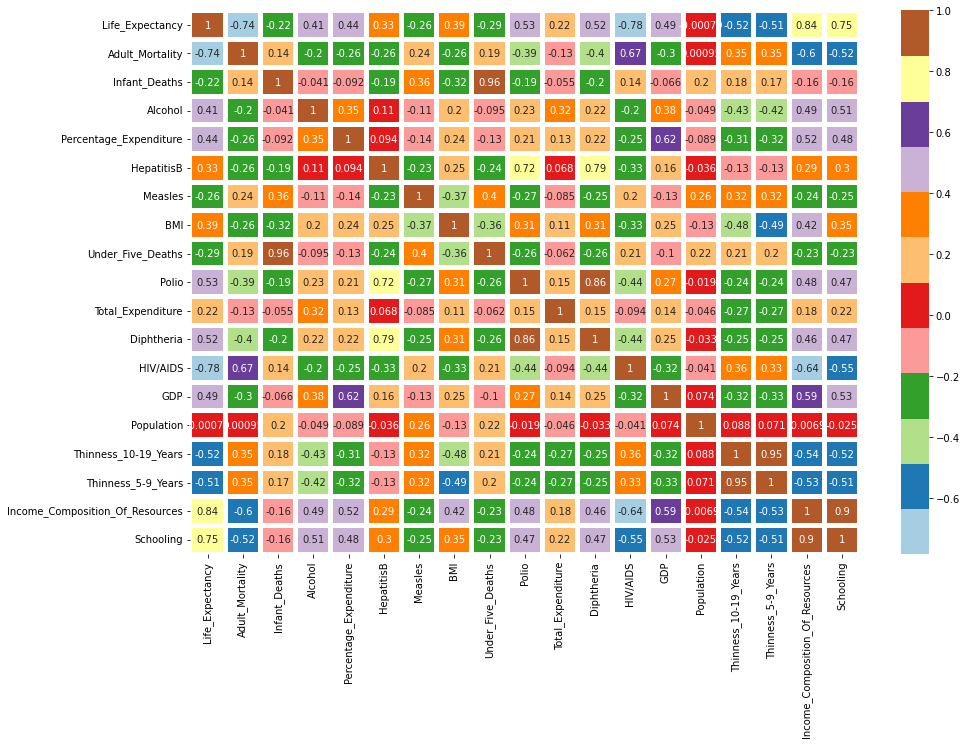

In [71]:
plt.figure(figsize= (15,10))
sns.heatmap(dfc.corr(),
            cmap="Paired", 
            linecolor = "white" ,
            linewidth= 4 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

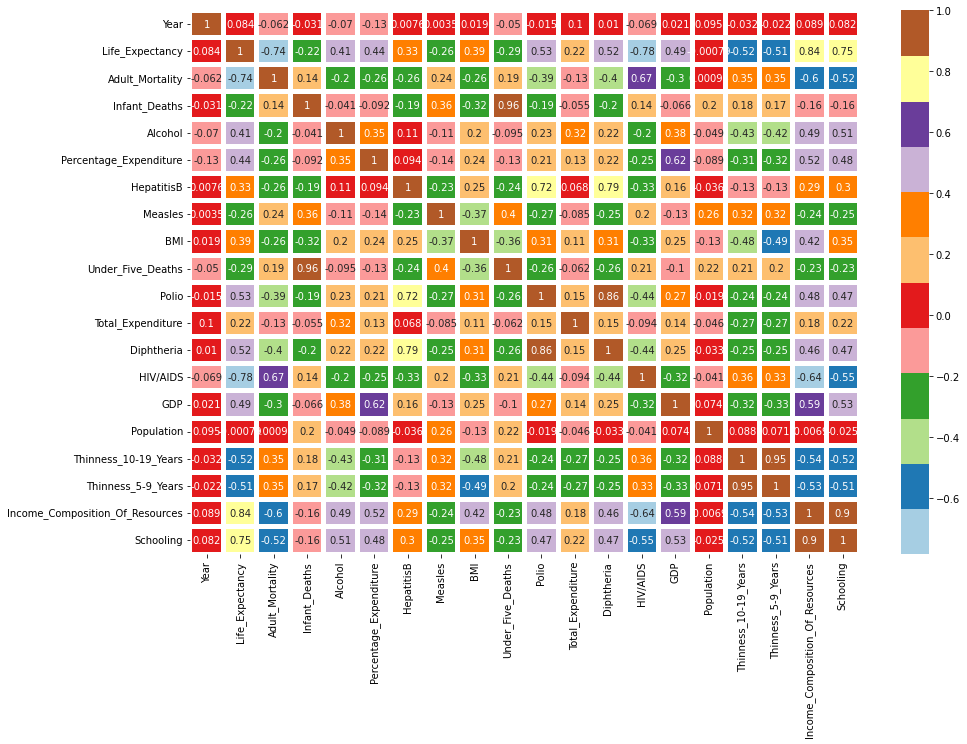

In [72]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),
            cmap="Paired", 
            linecolor = "white" ,
            linewidth= 4 ,  
            cbar= "cividis" ,
            annot=True)
plt.show()

**Checking Assumption of Linear Regression**

**Linearity**


> Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the Sales variable



**From Scatter Plot We can observe that there is a positive linear correlation between Temperature and Revenue.**

**Data Prepration**

**Dividing the data frame to independent and dependent variable**

In [73]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_10-19_Years',
       'Thinness_5-9_Years', 'Income_Composition_Of_Resources', 'Schooling'],
      dtype='object')

In [74]:
x = df.iloc[:, 4:]
y = df['Life_Expectancy']

In [75]:
x

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,263.0,62.000000,0.010000,71.279624,65.0,831,21.200000,83.000000,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
1,74.0,35.129032,4.600000,364.975229,99.0,0,28.840789,44.844961,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,19.0,21.000000,5.288333,0.000000,95.0,63,28.840789,24.000000,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
3,335.0,66.000000,5.288333,0.000000,64.0,118,23.300000,98.000000,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,13.0,35.129032,5.288333,0.000000,99.0,0,34.700000,44.844961,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,168.0,9.000000,8.180000,0.000000,55.0,0,28.817978,10.000000,76.0,3.98,52.0,0.1,10604.040364,9.487742e+06,1.6,1.5,0.745,13.4
1470,135.0,28.000000,3.580000,0.000000,87.0,352,21.200000,35.000000,93.0,5.53,93.0,0.2,10604.040364,9.487742e+06,14.7,15.5,0.633,11.6
1471,238.0,37.000000,0.040000,0.000000,78.0,7,34.700000,47.000000,78.0,5.12,78.0,0.1,10604.040364,9.487742e+06,13.8,13.7,0.480,8.5
1472,45.0,31.000000,2.120000,153.678375,87.0,140,21.200000,49.000000,52.0,4.87,87.0,1.8,1369.682490,1.382517e+06,6.8,6.7,0.504,11.4


In [76]:
y

0       65.0
1       77.8
2       75.6
3       52.4
4       76.4
        ... 
1469    73.2
1470    74.9
1471    63.8
1472    55.7
1473    48.2
Name: Life_Expectancy, Length: 1474, dtype: float64

In [77]:
# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [78]:
x

,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years,Income_Composition_Of_Resources,Schooling
0,263.0,62.000000,0.010000,71.279624,65.0,831,21.200000,83.000000,52.0,8.16,65.0,0.1,584.259210,2.865628e+07,15.3,15.5,0.479,10.1
1,74.0,35.129032,4.600000,364.975229,99.0,0,28.840789,44.844961,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
2,19.0,21.000000,5.288333,0.000000,95.0,63,28.840789,24.000000,95.0,7.08,95.0,0.1,4132.762920,2.865628e+07,6.0,5.8,0.743,14.4
3,335.0,66.000000,5.288333,0.000000,64.0,118,23.300000,98.000000,52.0,7.08,64.0,1.8,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
4,13.0,35.129032,5.288333,0.000000,99.0,0,34.700000,44.844961,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,168.0,9.000000,8.180000,0.000000,55.0,0,28.817978,10.000000,76.0,3.98,52.0,0.1,10604.040364,9.487742e+06,1.6,1.5,0.745,13.4
1470,135.0,28.000000,3.580000,0.000000,87.0,352,21.200000,35.000000,93.0,5.53,93.0,0.2,10604.040364,9.487742e+06,14.7,15.5,0.633,11.6
1471,238.0,37.000000,0.040000,0.000000,78.0,7,34.700000,47.000000,78.0,5.12,78.0,0.1,10604.040364,9.487742e+06,13.8,13.7,0.480,8.5
1472,45.0,31.000000,2.120000,153.678375,87.0,140,21.200000,49.000000,52.0,4.87,87.0,1.8,1369.682490,1.382517e+06,6.8,6.7,0.504,11.4


In [85]:
df = x.copy()

In [86]:
compute_vif(x.columns).sort_values('VIF', ascending=False)

,Variable,VIF
7,Under_Five_Deaths,17.326877
1,Infant_Deaths,15.997012
15,Thinness_5-9_Years,10.097935
14,Thinness_10-19_Years,10.079777
16,Income_Composition_Of_Resources,7.485073
17,Schooling,5.529176
10,Diphtheria,5.293296
8,Polio,4.083056
4,HepatitisB,2.891825
11,HIV/AIDS,2.375628


In [87]:
df2 = df.copy()
df2['Children'] = df.apply(lambda x: x['Infant_Deaths'] + x['Under_Five_Deaths'],axis=1)

df2['Thinness'] = df.apply(lambda x: x['Thinness_5-9_Years'] + x['Thinness_10-19_Years'],axis=1)
v = df2.drop(['Infant_Deaths','Under_Five_Deaths','Thinness_5-9_Years','Thinness_10-19_Years','Income_Composition_Of_Resources'],axis=1)

In [88]:
df = v.copy()

In [89]:
compute_vif(v.columns).sort_values('VIF', ascending=False)

,Variable,VIF
8,Diphtheria,5.288590
6,Polio,4.065700
3,HepatitisB,2.885213
12,Schooling,2.586209
9,HIV/AIDS,2.183037
0,Adult_Mortality,2.016496
10,GDP,1.921792
14,Thinness,1.817604
2,Percentage_Expenditure,1.799359
1,Alcohol,1.570748


,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Measles,BMI,Under_Five_Deaths,Total_Expenditure,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years
0,263.0,62.000000,0.010000,71.279624,831,21.200000,83.000000,8.16,0.1,584.259210,2.865628e+07,15.3,15.5
1,74.0,35.129032,4.600000,364.975229,0,28.840789,44.844961,6.00,0.1,3954.227830,2.887300e+04,1.2,1.3
2,19.0,21.000000,5.288333,0.000000,63,28.840789,24.000000,7.08,0.1,4132.762920,2.865628e+07,6.0,5.8
3,335.0,66.000000,5.288333,0.000000,118,23.300000,98.000000,7.08,1.8,3695.793748,2.785935e+06,8.3,8.2
4,13.0,35.129032,5.288333,0.000000,0,34.700000,44.844961,7.08,0.2,13566.954100,1.109741e+07,3.3,3.3


,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Measles,BMI,Under_Five_Deaths,Total_Expenditure,HIV/AIDS,GDP,Population,Thinness_10-19_Years,Thinness_5-9_Years
0,263.0,62.000000,0.010000,71.279624,831,21.200000,83.000000,8.16,0.1,584.259210,2.865628e+07,15.3,15.5
1,74.0,35.129032,4.600000,364.975229,0,28.840789,44.844961,6.00,0.1,3954.227830,2.887300e+04,1.2,1.3
2,19.0,21.000000,5.288333,0.000000,63,28.840789,24.000000,7.08,0.1,4132.762920,2.865628e+07,6.0,5.8
3,335.0,66.000000,5.288333,0.000000,118,23.300000,98.000000,7.08,1.8,3695.793748,2.785935e+06,8.3,8.2
4,13.0,35.129032,5.288333,0.000000,0,34.700000,44.844961,7.08,0.2,13566.954100,1.109741e+07,3.3,3.3


In [92]:
v.head(2)

,Adult_Mortality,Alcohol,Percentage_Expenditure,HepatitisB,Measles,BMI,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling,Children,Thinness
0,263.0,0.01,71.279624,65.0,831,21.200000,52.0,8.16,65.0,0.1,584.25921,28656282.0,10.1,145.000000,30.8
1,74.0,4.60,364.975229,99.0,0,28.840789,99.0,6.00,99.0,0.1,3954.22783,28873.0,14.2,79.973993,2.5


In [90]:
x = v.copy()

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

**Spliting the X,Y into train and test**

In [94]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2, random_state=0) 

**Training the Algorithm**

In [95]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training Successfully Completed")

Training Successfully Completed


In [96]:
regressor.score(x_train,y_train)

0.8400942133679442

In [97]:
#Printing the model coefficients
print(regressor.intercept_)

70.60027282591011


In [98]:
# pair the feature names with the coefficients
list(zip(X, regressor.coef_))

[(array([ 1.01650017, -1.18101614, -0.58186154, -1.53847011,  2.08443622,
         -1.82889134, -2.46506123,  0.7983442 , -1.61790648, -0.59064736,
         -0.94096576,  2.41145884, -0.88083533,  1.41209437,  2.94135541]),
  -2.2080224639604884),
 (array([-0.88439296,  0.01723884,  0.16032532,  0.94564622, -0.62562181,
          0.11794265,  0.83150309, -0.09876748,  0.83190425, -0.59064736,
         -0.32878678, -0.8785476 ,  0.55720862,  0.30151367, -0.88266471]),
  0.5336962156117071),
 (array([-1.43756292,  0.19693358, -0.76198954,  0.65339724, -0.42016615,
          0.11794265,  0.55094443,  0.34978836,  0.54369123, -0.59064736,
         -0.2963546 ,  2.41145884,  0.62735711, -0.29580799,  0.37399207]),
  0.521045083097601),
 (array([ 1.74064994,  0.19693358, -0.76198954, -1.61153236, -0.24080009,
         -1.29382211, -2.46506123,  0.34978836, -1.68995974,  2.10426188,
         -0.37573318, -0.56169211, -0.42487017,  1.73659582,  1.00907669]),
  -0.9489003329978771),
 (array([-1

In [99]:
print("Training Score:",regressor.score(x_train,y_train))
print("Test Score:",regressor.score(x_test,y_test))

Training Score: 0.8400942133679442
Test Score: 0.8161903280642417


In [100]:
print('Intercept is :',regressor.intercept_)
print('Coefficient is :',regressor.coef_)

Intercept is : 70.60027282591011
Coefficient is : [-2.20802246  0.53369622  0.52104508 -0.94890033  0.199824   -0.01231579
  0.63352242  0.19835448  0.91550019 -3.21218507  0.49415101  0.11073028
  2.03524498 -0.5527662  -0.68194786]


In [101]:
y_predic = regressor.predict(x_test)
y_predic

array([72.96789499, 74.3629074 , 81.13476181, 67.88887514, 74.88532556,
       70.0155916 , 71.36473944, 56.81985734, 74.38403217, 53.96355354,
       72.88984412, 79.86323842, 83.58115686, 72.99304812, 79.22058656,
       56.14162618, 70.19335413, 74.4642163 , 72.12668774, 58.27426934,
       69.98356228, 56.8509918 , 72.24906056, 60.98215608, 79.99885934,
       56.03617441, 76.0251532 , 60.80484852, 71.67850698, 82.67231617,
       81.09098922, 71.81320579, 74.44796262, 76.25685769, 57.77553027,
       78.66696864, 53.5651261 , 69.22283874, 75.47330226, 73.63499732,
       73.16443783, 78.04153667, 73.27950514, 67.73116902, 79.71437041,
       81.86063005, 79.46203129, 72.94142   , 63.35453036, 69.50925676,
       74.74202485, 74.28954661, 58.09160384, 76.27179906, 75.77840209,
       73.78328743, 49.43960572, 77.91543226, 59.39235724, 76.4631146 ,
       75.74500773, 75.20597728, 61.85074241, 72.40946959, 78.83315559,
       75.41257411, 62.08668672, 77.80137333, 72.16444006, 80.05

In [102]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predic})    
df1

,Actual,Predicted
1114,73.3,72.967895
1157,75.1,74.362907
446,81.0,81.134762
853,65.6,67.888875
458,74.1,74.885326
...,...,...
353,78.0,75.899954
491,81.5,79.428866
601,80.0,79.448331
798,69.2,72.486173


**Mean of Residuals**


> Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.




In [103]:
y_pred_train = regressor.predict(x_train)
residuals = y_train - y_pred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals = {}".format(mean_residuals))

Mean of Residuals = 1.2619817546069973e-14


**The mean of the residuals is so small that we can consider it zero.**

**Check for Homoscedasticity**




> Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.



**Detecting heteroscedasticity!**


> **Graphical Method:** Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.



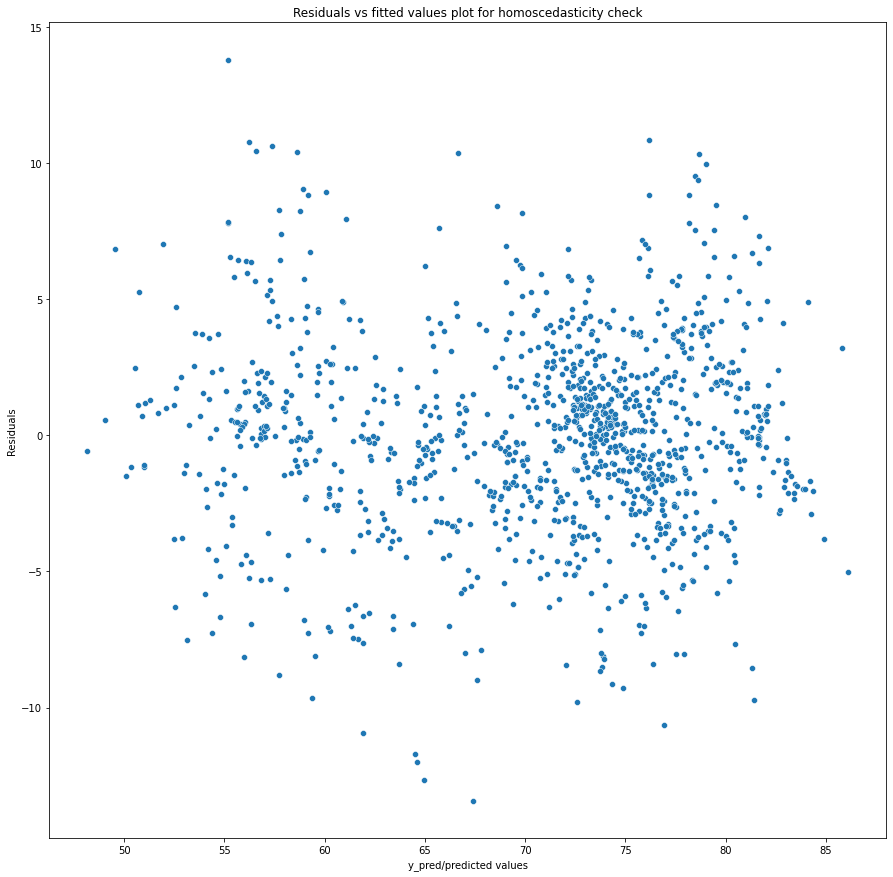

In [104]:
plt.figure(figsize=(15,15))
sns.scatterplot(y_pred_train, residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')


**From the scatter plot it is clear that there is no specific patters forming. So we can say homoscedasticity is present.**

In [105]:
# Homoscadasticity

from statsmodels.formula.api import ols

reg = ols("y~x", data = df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     498.7
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        04:42:52   Log-Likelihood:                -3948.1
No. Observations:                1474   AIC:                             7928.
Df Residuals:                    1458   BIC:                             8013.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.8618      1.299     48.403      0.0

**Goldfeld Quandt Test**

**Checking heteroscedasticity :** Using Goldfeld Quandt we test for heteroscedasticity.




> **Null Hypothesis:** Error terms are homoscedastic

> **Alternative Hypothesis:** Error terms are heteroscedastic.





In [106]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 0.8893314289002805), ('p-value', 0.919919093564014)]

Since p value is greater than 0.05 in Goldfeld Quandt Test.
Therefore, we do not reject Null hypothesis.
Hnece, we Conclude that error terms are homoscedastic.





**Check for Normality of error terms/residuals**

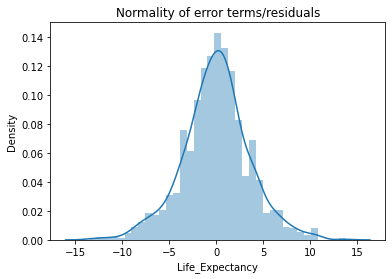

In [107]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

((array([-3.24476482, -2.98312329, -2.83734392, ...,  2.83734392,
          2.98312329,  3.24476482]),
  array([-13.42352597, -12.64914591, -11.9877392 , ...,  10.76884621,
          10.83068356,  13.80358406])),
 (3.5464217612027142, 1.3776072894692281e-14, 0.9950152208980596))

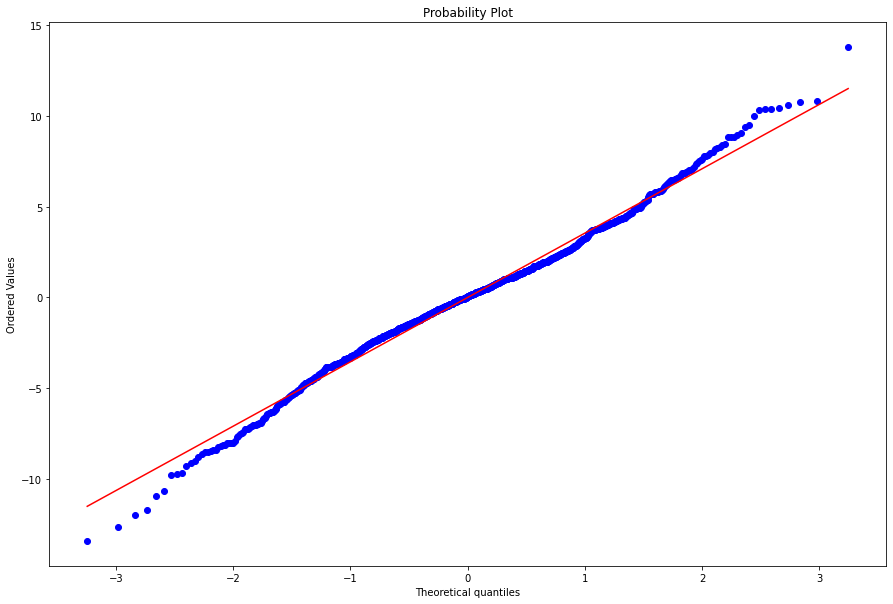

In [108]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize = (15,10))
stats.probplot(residuals, dist = "norm", plot = plt)

**No autocorrelation of residuals**

> When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

> In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

> There should not be autocorrelation in the data so the error terms should not form any pattern.

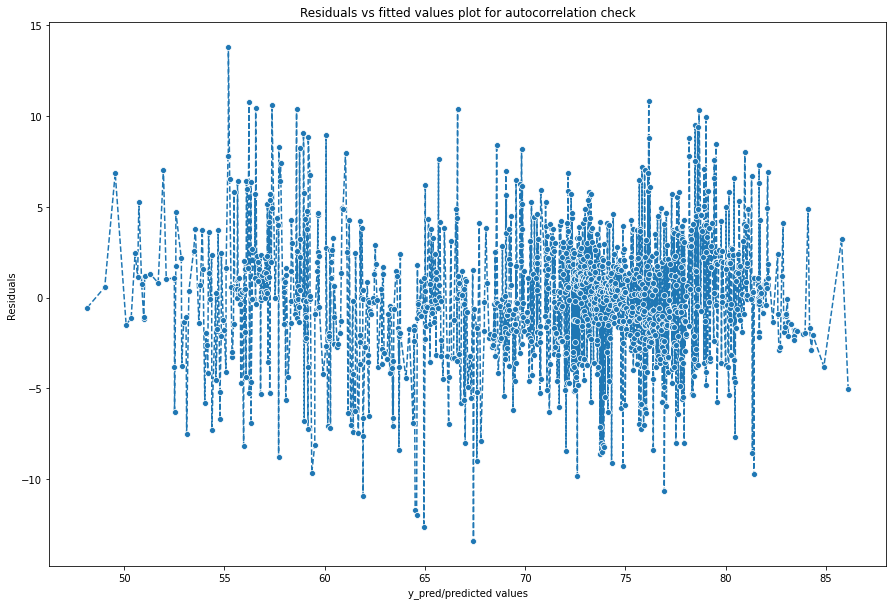

In [109]:
plt.figure(figsize=(15,10))
sns.lineplot(y_pred_train, residuals, marker = 'o', linestyle = '--')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs fitted values plot for autocorrelation check')
plt.show()

**Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.**

> **Null Hypothesis:** Autocorrelation is absent.

> **Alternative Hypothesis:** Autocorrelation is present.

In [110]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.2520176009984029

**Since p value is greater than 0.05 we do not reject the null hypothesis that error terms are not autocorrelated.**

**No perfect multicollinearity**

> In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

**Model Evaluation**

In [111]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [112]:
# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_predic))
print("MAE:",mse)

MAE: 2.599667684699711


In [114]:
# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_predic)))
print("RMSE:",rmse)

RMSE: 3.4193724493740896


In [115]:
# To find coefficient of determination
r2 =  r2_score(y_test, y_predic)
print("R-Square:",r2)

R-Square: 0.8161903280642417


In [116]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_predic)
meanSqErr = metrics.mean_squared_error(y_test, y_predic)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predic))
MAPE = metrics.mean_absolute_percentage_error(y_test, y_predic)

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percenatge Error:', MAPE)


Mean Absolute Error: 2.599667684699711
Mean Square Error: 11.69210794753856
Root Mean Square Error: 3.4193724493740896
Mean Absolute Percenatge Error: 0.03751465270330956


In [117]:
## R Square
corr_matrix = np.corrcoef(y_test, y_predic)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.8214877897242198


In [118]:
## Adjusted R Square
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8347537422975178

**Linearity**


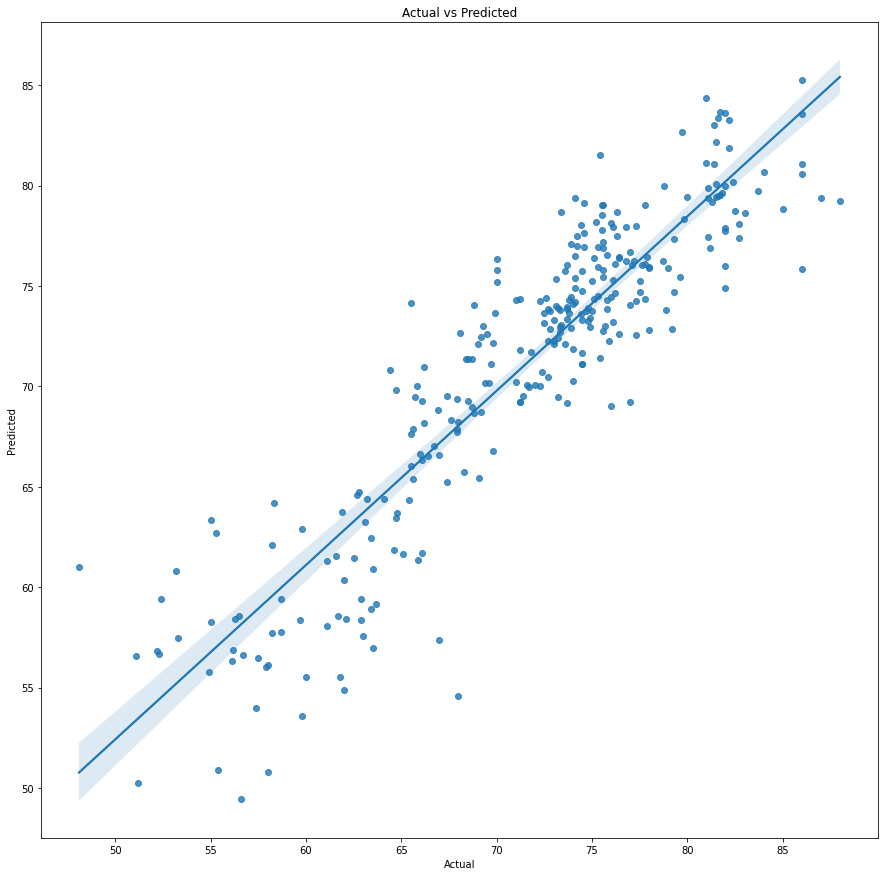

In [119]:
plt.figure(figsize=(15,15))
sns.regplot(y_test, y_predic)
plt.xlabel('Actual')
plt.ylabel('Predicted')
p = plt.title('Actual vs Predicted')